## Getting Started

In [37]:
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [58]:
import pandas as pd
import seaborn as sns

## The Fundamentals

**Before starting your project, first you have to read in your csv file (.data files also work with this as well)**

In [39]:
df = pd.read_csv("insurance.csv")

One of the first things to to when you first load in your data set is to get an idea of what your dataset even looks like. You can use the ```.head()``` function to lead the first 5 data points of your data set. You could also just run ```df```, but this will show all of the data points of your data set. Sometimes this isn't ideal since your dataset could have **millions** of data points, so we prefer to use ```.head()`` to get a simple idea.

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


When you use ```df[*insert column name here*]```, you will see all of the datapoints of that column only (essentially abstracting everything else). You can also know the length and the type of data that is contained in that column. For us, our length is 1338 and we have a continous data type of int64.

In [41]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

This will reveal all of the unique values within the "age" column of your dataframe.

In [42]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

You can also perform some mathematical operations on the dataframe at a specific column with ```.mean()```, ```.sum()```, and ```.count()```.

In [43]:
mean = df["age"].mean()
sum = df["age"].sum()
count = df["age"].count()

print(f'Mean age in df is: {mean}, Sum of all ages in df is: {sum}, Total count of datapoints in age is {count}')

Mean age in df is: 39.20702541106129, Sum of all ages in df is: 52459, Total count of datapoints in age is 1338


This line of code will only show the the datapoints where the person is older than the age of 30. Every person's datapoint with an age less than or equal to 30 is abstracted out of the df. **Warning: this line of code doesn't actually change the permanent state of the dataframe, since it's just an expression. If you want to change the permanent state of the dataframe you should use ```df = {enter expression here}```.

In [44]:
df[df["age"] > 30]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
...,...,...,...,...,...,...,...
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830


Sometimes when you are doing lots of operations on your dataframe, it might be useful to create a copy of the original and assign the copy to a new dataframe. This is used a lot in practice when you **don't** want to change the permanent state of the original dataframe.

In [45]:
new_df = df.copy() #Beware that if this dataframe has millions of datapoints, this will be a bad idea!
print(new_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In tasks like machine learning, you will see that many people drop certain "features" or columns that are irrelevant to a specific task. You can drop a column by using the ```.drop()``` function. In order for this function to work though, you need to pass in a parameter of the columns you want to drop. For example, I wanted to drop the BMI column, so I pass in a parameter of ```drop(columns=['BMI'])```

In [46]:
new_df = new_df.drop(columns=['bmi'])
print(new_df.head())

   age     sex  children smoker     region      charges
0   19  female         0    yes  southwest  16884.92400
1   18    male         1     no  southeast   1725.55230
2   28    male         3     no  southeast   4449.46200
3   33    male         0     no  northwest  21984.47061
4   32    male         0     no  northwest   3866.85520


Another common thing that you will see is data integration. Maybe you have two partitions of the same dataframe and you want to merge them back together, here is how you would do that. To do this, you can use the ```pd.concat()``` function that returns a new dataframe. This also requires a parameter of a list of dataframes that you would like to couple back together. Here is an example:

In [47]:
one_df = df[df['age'] < 20].copy()
two_df = df[df['sex'] != 'male'].copy()

combined_df = pd.concat([one_df, two_df], ignore_index=True) #must be a list of dataframes since it expects an iterable!
print(combined_df)

     age     sex     bmi  children smoker     region      charges
0     19  female  27.900         0    yes  southwest  16884.92400
1     18    male  33.770         1     no  southeast   1725.55230
2     19    male  24.600         1     no  southwest   1837.23700
3     18    male  34.100         0     no  southeast   1137.01100
4     18  female  26.315         0     no  northeast   2198.18985
..   ...     ...     ...       ...    ...        ...          ...
794   52  female  44.700         3     no  southwest  11411.68500
795   18  female  31.920         0     no  northeast   2205.98080
796   18  female  36.850         0     no  southeast   1629.83350
797   21  female  25.800         0     no  southwest   2007.94500
798   61  female  29.070         0    yes  northwest  29141.36030

[799 rows x 7 columns]


Another operation on dataframes that is fairly common is adding another column to your dataframe. The way you can do this is simply doing ```df['insert column name here'] = {insert list of values}```. This will create a brand new column with a list of values that you choose to create.

In [48]:
new_df = df.copy()

new_df['Entry Count'] = [i for i in range(0, len(df))]

print(new_df.columns) #You can see our new column was added!

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Entry Count'],
      dtype='object')


A powerful tool that pandas comes with is the ability to see what the correlation is between different features in your dataframe. The correlation coefficient is a value ranged from -1 to 1. If your value values closely to 0, then there isn't a significant correlation between the 2 features. If it is > 0, then there is a noticeable positive correlation, meaning if one values increases the other also increases. If it is < 0, then there is a significant negative correlation, meaning if one values decreases the other increases. You can use this function by calling the ```.corr()``` function.

In [49]:
correlation = df['age'].corr(df['bmi'])

print(f'The correlation coefficient between age and BMI is: {correlation}') 

The correlation coefficient between age and BMI is: 0.10927188154853519


## Visualizing Data

<Axes: xlabel='age', ylabel='charges'>

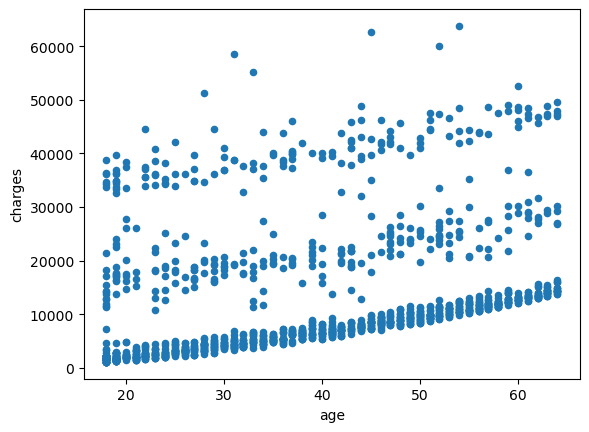

In [50]:
# EXAMPLE OF GOOD VISUALIZATION
df.plot.scatter(x="age", y="charges")

<Axes: xlabel='age'>

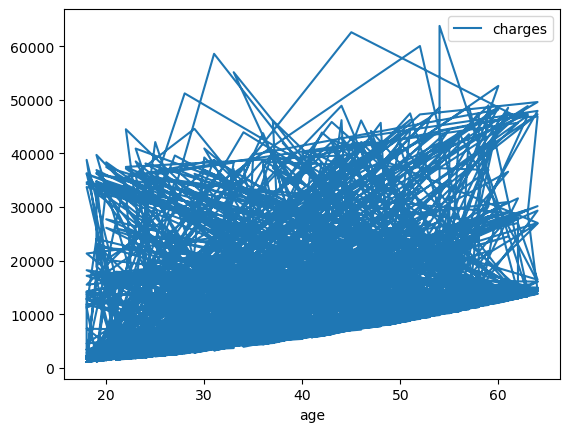

In [51]:
# EXAMPLE TO SHOW THERES BAD WAYS TO VISUALIZE DATA AS WELL
df.plot.line(x="age", y="charges")

<Axes: xlabel='sex'>

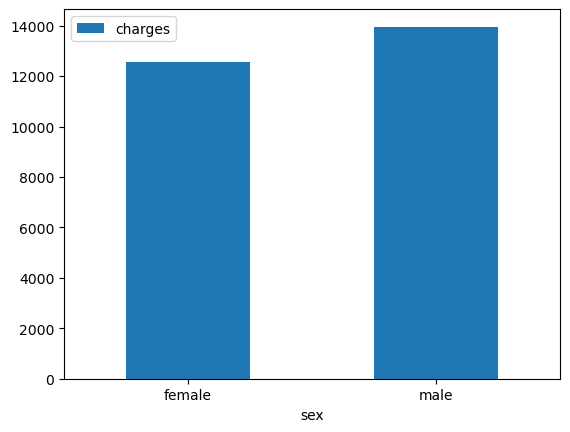

In [52]:
pivot_table = df.pivot_table(values=['charges'], index='sex', aggfunc='mean')
pivot_table.plot.bar(rot=0)

## Examples of Visualization using Seaborn

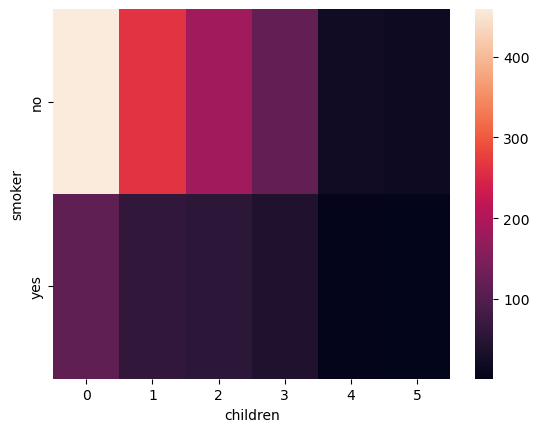

In [54]:
heatmap = pd.crosstab(df["smoker"], df["children"])

ax = sns.heatmap(heatmap)

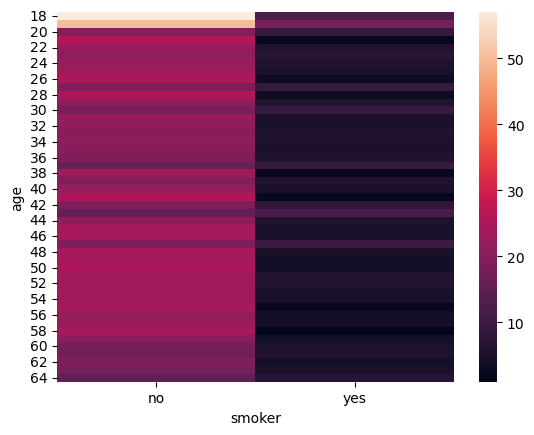

In [55]:
heatmap = pd.crosstab(df["age"], df["smoker"])

ax = sns.heatmap(heatmap)

In [56]:
BINS = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

df["age_bins"] = pd.cut(df["age"], BINS)

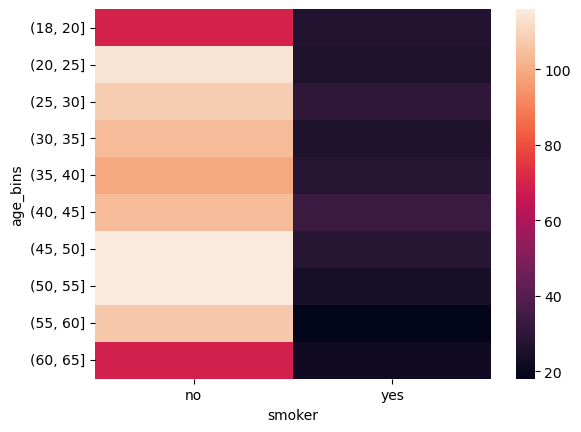

In [57]:
heatmap = pd.crosstab(df["age_bins"], df["smoker"])

ax = sns.heatmap(heatmap)